In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df.iloc[:,3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [11]:
X[:10]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


In [12]:
y[:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)


In [14]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [21]:
model = Sequential()

model.add(Dense(32,activation='relu',input_dim=11, kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

In [23]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(X_train_trf,y_train,batch_size=8,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
800/800 [==============================] - 5s 3ms/step - loss: 0.7543 - accuracy: 0.7078 - val_loss: 0.6355 - val_accuracy: 0.7975
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.6340 - accuracy: 0.7934 - val_loss: 0.5874 - val_accuracy: 0.8200
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.6025 - accuracy: 0.8016 - val_loss: 0.5584 - val_accuracy: 0.8256
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.5767 - accuracy: 0.8020 - val_loss: 0.5330 - val_accuracy: 0.8288
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.5479 - accuracy: 0.8108 - val_loss: 0.5053 - val_accuracy: 0.8375
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.5367 - accuracy: 0.8150 - val_loss: 0.4896 - val_accuracy: 0.8394
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.5150 - accuracy: 0.8152 - val_loss: 0.4725 - val_accuracy: 0.8438

In [25]:
y_pred = model.predict(X_test_trf)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.3296458 ],
       [0.29556054],
       [0.11770412],
       ...,
       [0.08493102],
       [0.19356324],
       [0.27673227]], dtype=float32)

In [26]:
from sklearn.metrics import accuracy_score

y_pred = y_pred.argmax(axis=-1)
accuracy_score(y_test,y_pred)

0.7975

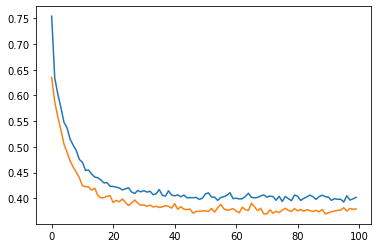

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

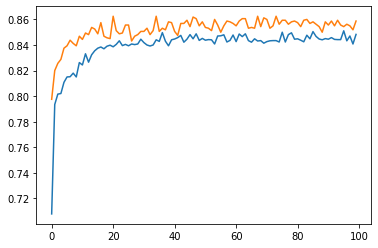

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])